<a href="https://colab.research.google.com/github/parksj0923/KORartilleryman/blob/master/Artillery/osam(military)/osam_machine_learning/house_price_predict/House_Price_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = pd.read_csv("train.csv")

In [ ]:
df_train


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

## Missing data

isnull()은 값이 none인 애들은 True, 아닌애들은 False로 바꿈

In [ ]:
df_missing = df_train.isnull().sum()

In [ ]:
df_missing = df_missing.sort_values(ascending=False)

In [ ]:
df_missing

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

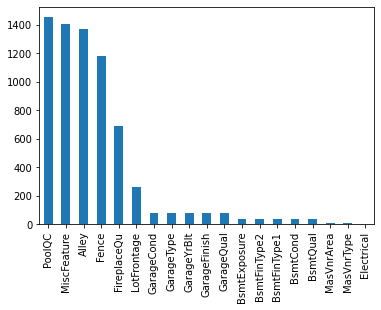

In [ ]:
df_missing[df_missing > 0].plot.bar()

In [ ]:
df_missing = df_missing[df_missing >0]

In [ ]:
# missing data가 있는 feature를 제거
df_train = df_train.drop(df_missing.index.tolist(),axis=1)

In [ ]:
df_train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,0,0,953,953,GasA,Ex,Y,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,2,460,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,790,163,589,1542,GasA,TA,Y,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,2,500,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,Ex,Gd,Stone,275,0,877,1152,GasA,Ex,Y,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,1,252,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,TA,TA,CBlock,49,1029,0,1078,GasA,Gd,Y,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,1,240,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [ ]:
# missing data가 있는지 재확인
df_train.isnull().sum().max()

0

In [ ]:
numeric = [df_train.dtypes[f] for f in df_train.columns]
numeric


[dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('int64')]

In [ ]:
numeric = [f for f in df_train.columns if df_train.dtypes[f] !='object']
numeric.remove('Id')
numeric.remove('SalePrice')

In [ ]:
categorical = [f for f in df_train.columns if df_train.dtypes[f] =='object']

In [ ]:
categorical


['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [ ]:
df_train['ExterQual']

0       Gd
1       TA
2       Gd
3       TA
4       Gd
        ..
1455    TA
1456    TA
1457    Ex
1458    TA
1459    Gd
Name: ExterQual, Length: 1460, dtype: object

## Categorical 데이터를 processing

In [ ]:
df_order = pd.DataFrame()

In [ ]:
df_order

""


In [ ]:
feature_name = "ExterQual"

In [ ]:
df_train[feature_name]

0       Gd
1       TA
2       Gd
3       TA
4       Gd
        ..
1455    TA
1456    TA
1457    Ex
1458    TA
1459    Gd
Name: ExterQual, Length: 1460, dtype: object

In [ ]:
df_order['val'] = df_train[feature_name].unique()

In [ ]:
df_order

,val
0,Gd
1,TA
2,Ex
3,Fa


In [ ]:
df_order.index = df_order.val

In [ ]:
df_order

,val
val,
Gd,Gd
TA,TA
Ex,Ex
Fa,Fa


In [ ]:
df_train[[feature_name,"SalePrice"]]

,ExterQual,SalePrice
0,Gd,208500
1,TA,181500
2,Gd,223500
3,TA,140000
4,Gd,250000
...,...,...
1455,TA,175000
1456,TA,210000
1457,Ex,266500
1458,TA,142125


여기서 원하는것은 같은 class 값의 평균값을 구하고 싶음

In [ ]:
df_order['mean_price'] = df_train[[feature_name, 'SalePrice']].groupby(feature_name).mean()['SalePrice']

In [ ]:
df_order

,val,mean_price
val,,
Gd,Gd,231633.510246
TA,TA,144341.313466
Ex,Ex,367360.961538
Fa,Fa,87985.214286


In [ ]:
df_order = df_order.sort_values('mean_price')

In [ ]:
df_order

,val,mean_price
val,,
Fa,Fa,87985.214286
TA,TA,144341.313466
Gd,Gd,231633.510246
Ex,Ex,367360.961538


In [ ]:
df_order['rank'] = range(1,len(df_order)+1)

In [ ]:
df_order

,val,mean_price,rank
val,,,
Fa,Fa,87985.214286,1
TA,TA,144341.313466,2
Gd,Gd,231633.510246,3
Ex,Ex,367360.961538,4


In [ ]:
df_order = df_order['rank'].to_dict()

In [ ]:
df_order

{'Ex': 4, 'Fa': 1, 'Gd': 3, 'TA': 2}

In [ ]:
df_train[[feature_name]]

,ExterQual
0,Gd
1,TA
2,Gd
3,TA
4,Gd
...,...
1455,TA
1456,TA
1457,Ex
1458,TA


In [ ]:
#원본 데이터는 나두는게 좋으니 새로운 feature를 만들어서 추가
#apply는 원하는 데이터의 한 row식 접근하면서 새로운 colum에 추가할 수 있음
df_train[feature_name + '_rank'] = df_train.apply(lambda x: df_order[x[feature_name]],axis=1)

In [ ]:
df_train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ExterQual_rank
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,3
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,2
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,3
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,2
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,0,0,953,953,GasA,Ex,Y,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,2,460,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000,2
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,790,163,589,1542,GasA,TA,Y,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,2,500,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000,2
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,Ex,Gd,Stone,275,0,877,1152,GasA,Ex,Y,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,1,252,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500,4
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,TA,TA,CBlock,49,1029,0,1078,GasA,Gd,Y,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,1,240,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125,2


In [ ]:
df_train[[feature_name, feature_name + '_rank']]


,ExterQual,ExterQual_rank
0,Gd,3
1,TA,2
2,Gd,3
3,TA,2
4,Gd,3
...,...,...
1455,TA,2
1456,TA,2
1457,Ex,4
1458,TA,2


요러한 카테고릭한 값들을 숫자로 변환시키는 짓을 모든 feature에 대하여 해야하는데 귀찮으니까

함수로 만들었음


In [ ]:
def add_rank_feature (feature_name, rank_feature_name):
  df_order = pd.DataFrame()
  df_order['val'] = df_train[feature_name].unique()
  df_order.index = df_order.val

  df_order['mean_price'] = df_train[[feature_name, 'SalePrice']].groupby(feature_name).mean()['SalePrice']
  df_order['rank'] = range(1,len(df_order)+1)
  df_order = df_order['rank'].to_dict()

  df_train[feature_name + '_rank'] = df_train.apply(lambda x: df_order[x[feature_name]],axis=1)

In [ ]:
rank_features = []
for feature_name in categorical:
  
  rank_feature_name = feature_name + '_rank'
  print(feature_name, '-->', rank_feature_name)
  add_rank_feature(feature_name, rank_feature_name)

  rank_features.append(rank_feature_name)

MSZoning --> MSZoning_rank
Street --> Street_rank
LotShape --> LotShape_rank
LandContour --> LandContour_rank
Utilities --> Utilities_rank
LotConfig --> LotConfig_rank
LandSlope --> LandSlope_rank
Neighborhood --> Neighborhood_rank
Condition1 --> Condition1_rank
Condition2 --> Condition2_rank
BldgType --> BldgType_rank
HouseStyle --> HouseStyle_rank
RoofStyle --> RoofStyle_rank
RoofMatl --> RoofMatl_rank
Exterior1st --> Exterior1st_rank
Exterior2nd --> Exterior2nd_rank
ExterQual --> ExterQual_rank
ExterCond --> ExterCond_rank
Foundation --> Foundation_rank
Heating --> Heating_rank
HeatingQC --> HeatingQC_rank
CentralAir --> CentralAir_rank
KitchenQual --> KitchenQual_rank
Functional --> Functional_rank
PavedDrive --> PavedDrive_rank
SaleType --> SaleType_rank
SaleCondition --> SaleCondition_rank


In [ ]:
df_train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ExterQual_rank,MSZoning_rank,Street_rank,LotShape_rank,LandContour_rank,Utilities_rank,LotConfig_rank,LandSlope_rank,Neighborhood_rank,Condition1_rank,Condition2_rank,BldgType_rank,HouseStyle_rank,RoofStyle_rank,RoofMatl_rank,Exterior1st_rank,Exterior2nd_rank,ExterCond_rank,Foundation_rank,Heating_rank,HeatingQC_rank,CentralAir_rank,KitchenQual_rank,Functional_rank,PavedDrive_rank,SaleType_rank,SaleCondition_rank
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,...,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,...,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,2,1,1,1,1,1,2,1,2,2,1,1,2,1,1,2,2,1,2,1,1,1,2,1,1,1,1
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,...,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,...,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,2,1,1,2,1,1,3,1,3,1,1,1,1,1,1,3,3,1,3,1,2,1,1,1,1,1,2
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,...,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,1,1,1,2,1,1,2,1,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,0,0,953,953,GasA,Ex,Y,953,694,0,1647,0,0,2,...,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000,2,1,1,1,1,1,1,1,18,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,790,163,589,1542,GasA,TA,Y,2073,0,0,2073,1,0,2,...,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000,2,1,1,1,1,1,1,1,7,1,1,1,2,1,1,8,5,1,2,1,3,1,2,2,1,1,1
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,Ex,Gd,Stone,275,0,877,1152,GasA,Ex,Y,1188,1152,0,2340,0,0,2,...,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500,3,1,1,1,1,1,1,1,3,1,1,1,1,1,1,7,7,2,6,1,1,1,1,1,1,1,1
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,TA,TA,CBlock,49,1029,0,1078,GasA,Gd,Y,1078,0,0,1078,1,0,1,...,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125,2,1,1,1,1,1,1,1,12,1,1,1,2,2,1,2,2,1,2,1,2,1,1,1,1,1,1


In [ ]:
df_processed = df_train[rank_features + numeric]

In [ ]:
df_processed

,MSZoning_rank,Street_rank,LotShape_rank,LandContour_rank,Utilities_rank,LotConfig_rank,LandSlope_rank,Neighborhood_rank,Condition1_rank,Condition2_rank,BldgType_rank,HouseStyle_rank,RoofStyle_rank,RoofMatl_rank,Exterior1st_rank,Exterior2nd_rank,ExterQual_rank,ExterCond_rank,Foundation_rank,Heating_rank,HeatingQC_rank,CentralAir_rank,KitchenQual_rank,Functional_rank,PavedDrive_rank,SaleType_rank,SaleCondition_rank,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008
1,1,1,1,1,1,2,1,2,2,1,1,2,1,1,2,2,2,1,2,1,1,1,2,1,1,1,1,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007
2,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008
3,1,1,2,1,1,3,1,3,1,1,1,1,1,1,3,3,2,1,3,1,2,1,1,1,1,1,2,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006
4,1,1,2,1,1,2,1,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,1,1,1,1,1,1,18,1,1,1,1,1,1,1,1,2,1,1,1,1,1,2,1,1,1,1,60,7917,6,5,1999,2000,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,2,460,0,40,0,0,0,0,0,8,2007
1456,1,1,1,1,1,1,1,7,1,1,1,2,1,1,8,5,2,1,2,1,3,1,2,2,1,1,1,20,13175,6,6,1978,1988,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,2,500,349,0,0,0,0,0,0,2,2010
1457,1,1,1,1,1,1,1,3,1,1,1,1,1,1,7,7,3,2,6,1,1,1,1,1,1,1,1,70,9042,7,9,1941,2006,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1,252,0,60,0,0,0,0,2500,5,2010
1458,1,1,1,1,1,1,1,12,1,1,1,2,2,1,2,2,2,1,2,1,2,1,1,1,1,1,1,20,9717,5,6,1950,1996,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1,240,366,0,112,0,0,0,0,4,2010


In [ ]:
df_processed['SalePrice'] = df_train['SalePrice']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_processed

,MSZoning_rank,Street_rank,LotShape_rank,LandContour_rank,Utilities_rank,LotConfig_rank,LandSlope_rank,Neighborhood_rank,Condition1_rank,Condition2_rank,BldgType_rank,HouseStyle_rank,RoofStyle_rank,RoofMatl_rank,Exterior1st_rank,Exterior2nd_rank,ExterQual_rank,ExterCond_rank,Foundation_rank,Heating_rank,HeatingQC_rank,CentralAir_rank,KitchenQual_rank,Functional_rank,PavedDrive_rank,SaleType_rank,SaleCondition_rank,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,1,1,1,1,1,2,1,2,2,1,1,2,1,1,2,2,2,1,2,1,1,1,2,1,1,1,1,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,1,1,2,1,1,3,1,3,1,1,1,1,1,1,3,3,2,1,3,1,2,1,1,1,1,1,2,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,1,1,2,1,1,2,1,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,1,1,1,1,1,1,18,1,1,1,1,1,1,1,1,2,1,1,1,1,1,2,1,1,1,1,60,7917,6,5,1999,2000,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1,1,1,1,1,1,1,7,1,1,1,2,1,1,8,5,2,1,2,1,3,1,2,2,1,1,1,20,13175,6,6,1978,1988,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1,1,1,1,1,1,1,3,1,1,1,1,1,1,7,7,3,2,6,1,1,1,1,1,1,1,1,70,9042,7,9,1941,2006,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1,1,1,1,1,1,1,12,1,1,1,2,2,1,2,2,2,1,2,1,2,1,1,1,1,1,1,20,9717,5,6,1950,1996,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1,240,366,0,112,0,0,0,0,4,2010,142125


마지막으로 Correlation matrix를 뽑아본다면


In [ ]:
corrmat = df_processed.corr()

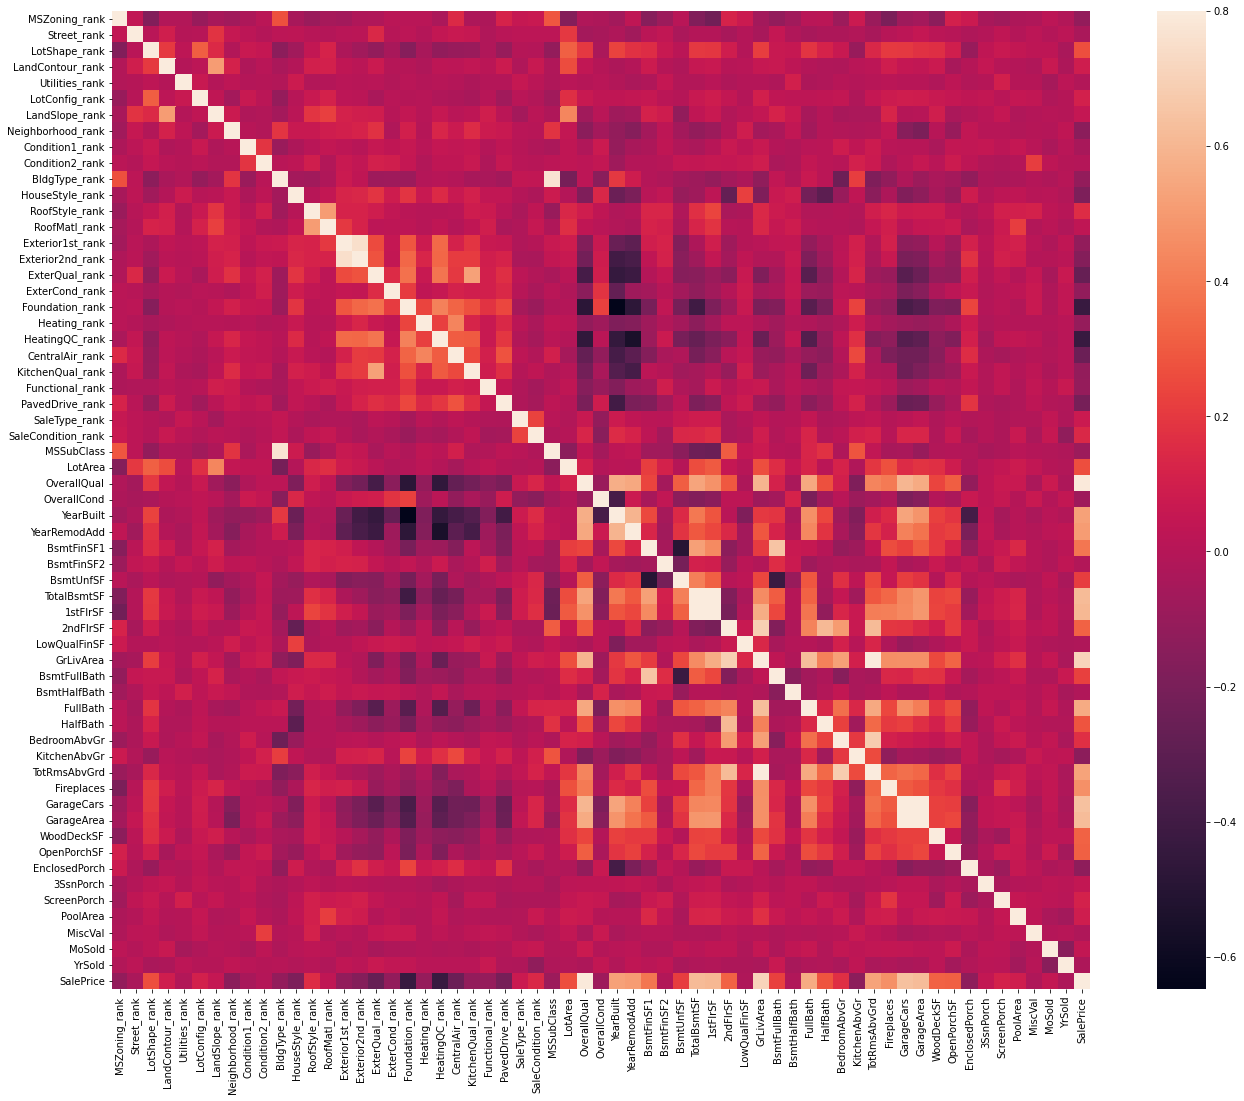

In [ ]:
f, ax = plt.subplots(figsize=(24,18))
sns.heatmap(corrmat, vmax=.8, square=True)


In [ ]:
df_features = corrmat.sort_values(by=['SalePrice'])['SalePrice']

In [ ]:
df_features[-40:]

YrSold               -0.028923
LowQualFinSF         -0.025606
MiscVal              -0.021190
BsmtHalfBath         -0.016844
Utilities_rank       -0.014314
BsmtFinSF2           -0.011378
Condition2_rank      -0.004833
RoofMatl_rank         0.035820
3SsnPorch             0.044584
MoSold                0.046432
LandSlope_rank        0.051152
SaleType_rank         0.072896
LandContour_rank      0.092009
PoolArea              0.092404
LotConfig_rank        0.109106
ScreenPorch           0.111447
SaleCondition_rank    0.142503
RoofStyle_rank        0.159332
BedroomAbvGr          0.168213
BsmtUnfSF             0.214479
BsmtFullBath          0.227122
LotArea               0.263843
LotShape_rank         0.267759
HalfBath              0.284108
OpenPorchSF           0.315856
2ndFlrSF              0.319334
WoodDeckSF            0.324413
BsmtFinSF1            0.386420
Fireplaces            0.466929
YearRemodAdd          0.507101
YearBuilt             0.522897
TotRmsAbvGrd          0.533723
FullBath

TODO:


*   전처리된 dataset으로 regression
*   Change distribution of the label



## Train test split

df_train 전체를 학습을 시키지는 않음

학습이 잘 되었는지 평가용도 만들어야 하기 때문

따라서 df_train을 학습용과 평가용 두가지로 나눠서 만들어놔야

In [ ]:
NUM_FEATURES = 30

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_features[-NUM_FEATURES-1:-1].index.tolist()

['MoSold',
 'LandSlope_rank',
 'SaleType_rank',
 'LandContour_rank',
 'PoolArea',
 'LotConfig_rank',
 'ScreenPorch',
 'SaleCondition_rank',
 'RoofStyle_rank',
 'BedroomAbvGr',
 'BsmtUnfSF',
 'BsmtFullBath',
 'LotArea',
 'LotShape_rank',
 'HalfBath',
 'OpenPorchSF',
 '2ndFlrSF',
 'WoodDeckSF',
 'BsmtFinSF1',
 'Fireplaces',
 'YearRemodAdd',
 'YearBuilt',
 'TotRmsAbvGrd',
 'FullBath',
 '1stFlrSF',
 'TotalBsmtSF',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'OverallQual']

In [ ]:
df_processed

,MSZoning_rank,Street_rank,LotShape_rank,LandContour_rank,Utilities_rank,LotConfig_rank,LandSlope_rank,Neighborhood_rank,Condition1_rank,Condition2_rank,BldgType_rank,HouseStyle_rank,RoofStyle_rank,RoofMatl_rank,Exterior1st_rank,Exterior2nd_rank,ExterQual_rank,ExterCond_rank,Foundation_rank,Heating_rank,HeatingQC_rank,CentralAir_rank,KitchenQual_rank,Functional_rank,PavedDrive_rank,SaleType_rank,SaleCondition_rank,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,1,1,1,1,1,2,1,2,2,1,1,2,1,1,2,2,2,1,2,1,1,1,2,1,1,1,1,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,1,1,2,1,1,3,1,3,1,1,1,1,1,1,3,3,2,1,3,1,2,1,1,1,1,1,2,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,1,1,2,1,1,2,1,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,1,1,1,1,1,1,18,1,1,1,1,1,1,1,1,2,1,1,1,1,1,2,1,1,1,1,60,7917,6,5,1999,2000,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1,1,1,1,1,1,1,7,1,1,1,2,1,1,8,5,2,1,2,1,3,1,2,2,1,1,1,20,13175,6,6,1978,1988,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1,1,1,1,1,1,1,3,1,1,1,1,1,1,7,7,3,2,6,1,1,1,1,1,1,1,1,70,9042,7,9,1941,2006,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1,1,1,1,1,1,1,12,1,1,1,2,2,1,2,2,2,1,2,1,2,1,1,1,1,1,1,20,9717,5,6,1950,1996,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [ ]:
x = df_processed[df_features[-NUM_FEATURES-1:-1].index.tolist()]
y = df_processed['SalePrice']

In [ ]:
x.shape, y.shape

((1460, 30), (1460,))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=42)

In [ ]:
x_train.shape, y_train.shape

((1314, 30), (1314,))

이것으로 데이터 준비가 끝났음

##x,y data store


In [ ]:
#최종 전처리된 데이터셋
x.shape, y.shape
# save numpy data
with open('x.npy','wb') as f:
  np.save(f,x)

with open('y.npy','wb') as f:
  np.save(f,y)



## 여러 모델 적용하기

## 먼저 linear regression을 이용해서 학습

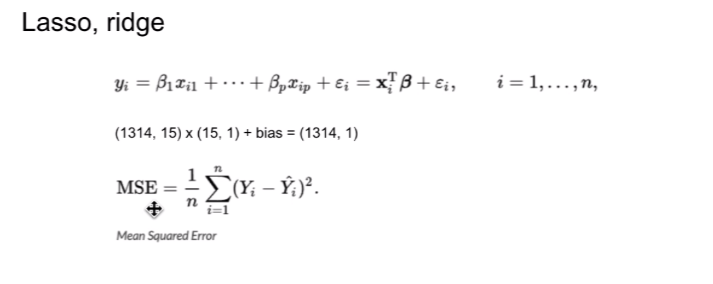

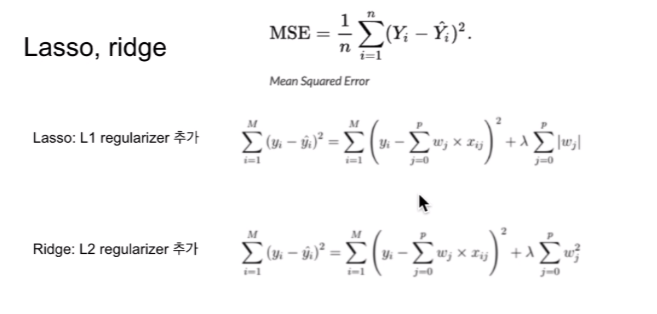

라쏘의 경우 weight들의 절대값의 합을 패널티로 줌으로써 오버피팅을 방지

-여기서 라쏘는 feature selection이 가능, 모든 feature를 사용한다는 것이 아닌 도움이 되지 않는 B들은 0으로 보내고 도움이 되는것만 살아남는다

-feature size가 크지 않는경우 L1을 사용한다

릿지의 경우 weight들의 제곱들의 합을 패널티로 줌으로써 오버피팅을 방지

-B들이 골고루 살아있으나  필요없는 B값들은 0으로 가까워 진다 

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
model = Lasso()


In [ ]:
model = model.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 762980480606.543, tolerance: 787334624.1028306
  positive)


In [ ]:
pred = model.predict(x_test)

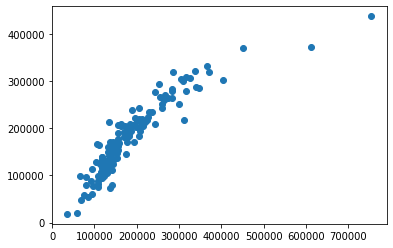

In [ ]:
#예측값(pred)와 원래 값(y_test)간의 차이를 봄
plt.scatter(y_test, pred)

얇게 1차방정식으로 나타나면 정확한건데, 지금은 약간 두꺼움, 그리고 약간 기울었음

In [ ]:
from sklearn import metrics


In [ ]:
def print_evalute(true, predicted):
  mae = metrics.mean_absolute_error(true, predicted)
  mse = metrics.mean_squared_error(true, predicted)
  rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
  r2_square = metrics.r2_score(true, predicted)
  print('MAE:', mae)
  print('MSE:',mse)
  print('RMSE:',rmse)
  print('R2 Square:',r2_square)


In [ ]:
print_evalute(y_test, pred)

MAE: 23899.157521884114
MSE: 1828691882.170767
RMSE: 42763.20710810599
R2 Square: 0.7998507195728647


In [ ]:
df_results = pd.concat([y_test.reset_index(),pd.DataFrame(pred)],axis =1)

In [ ]:
#SalePrice가 실제값, 0부분이 예측값임
df_results

,index,SalePrice,0
0,892,154500,148455.097258
1,1105,325000,306906.137040
2,413,115000,105274.806751
3,522,159000,168022.610310
4,1036,315500,308094.345944
...,...,...,...
141,526,132000,117466.083458
142,101,178000,181631.707511
143,1092,136500,171538.826179
144,411,145000,146504.106446


Label이 숫자형으로 숫자가 되게 크다. 이렇게 되면 예측하기가 되게 어려워짐

값의 범위가 작을수록 정규분포를 잘 따른다


따라서 지금 결과값이 정규분포를 따르는지 확인해보겠음

### Label transformation

In [ ]:
import scipy.stats as st

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


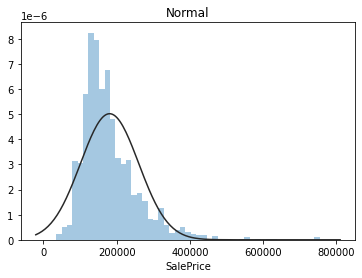

In [ ]:
plt.figure(2); plt.title('Normal')
sns.distplot(df_processed["SalePrice"], kde=False, fit=st.norm)

어라? 데이터가 정규분포랑 조금 다르네, 데이터를 조금 손볼까?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


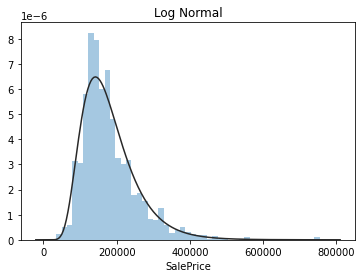

In [ ]:
plt.figure(3); plt.title('Log Normal')
sns.distplot(df_processed["SalePrice"], kde=False, fit=st.lognorm)

오우 로그를 취했더니 약간 비슷해졌는데? 그럼 y값에다가 log를 취하고 정규분포와 비교해볼까?


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


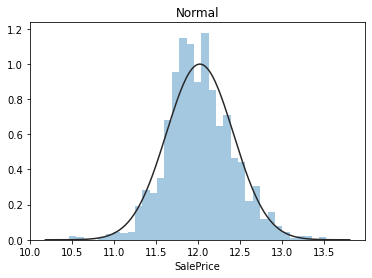

In [ ]:
plt.figure(4); plt.title('Normal')
sns.distplot(np.log(df_processed["SalePrice"]), kde=False, fit=st.norm)

오우 값이 작아지면서 정규분포와 가까워졌는데-이러면 학습할때 효율이 좋아짐

In [ ]:
model = Lasso()
model = model.fit(x_train,np.log(y_train))

학습은 끝났고, 여기서 그냥 pred = 하면 로그를 취한 값이 나오므로 log를 풀어줘야함

In [ ]:
pred = np.exp(model.predict(x_test))

In [ ]:
print_evalute(y_test, pred)
df_results = pd.concat([y_test.reset_index(),pd.DataFrame(pred)],axis =1)

MAE: 21821.514344047977
MSE: 1380264344.3287947
RMSE: 37151.9090267081
R2 Square: 0.8489308570732517


In [ ]:
df_results

,index,SalePrice,0
0,892,154500,135575.588069
1,1105,325000,309983.588529
2,413,115000,111813.002671
3,522,159000,149459.687189
4,1036,315500,261792.511242
...,...,...,...
141,526,132000,125125.806280
142,101,178000,176612.588088
143,1092,136500,165101.884735
144,411,145000,151776.116706


## MLP

### Data preprocessing

In [ ]:
df_processed

,MSZoning_rank,Street_rank,LotShape_rank,LandContour_rank,Utilities_rank,LotConfig_rank,LandSlope_rank,Neighborhood_rank,Condition1_rank,Condition2_rank,BldgType_rank,HouseStyle_rank,RoofStyle_rank,RoofMatl_rank,Exterior1st_rank,Exterior2nd_rank,ExterQual_rank,ExterCond_rank,Foundation_rank,Heating_rank,HeatingQC_rank,CentralAir_rank,KitchenQual_rank,Functional_rank,PavedDrive_rank,SaleType_rank,SaleCondition_rank,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,1,1,1,1,1,2,1,2,2,1,1,2,1,1,2,2,2,1,2,1,1,1,2,1,1,1,1,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,1,1,2,1,1,3,1,3,1,1,1,1,1,1,3,3,2,1,3,1,2,1,1,1,1,1,2,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,1,1,2,1,1,2,1,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,1,1,1,1,1,1,18,1,1,1,1,1,1,1,1,2,1,1,1,1,1,2,1,1,1,1,60,7917,6,5,1999,2000,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1,1,1,1,1,1,1,7,1,1,1,2,1,1,8,5,2,1,2,1,3,1,2,2,1,1,1,20,13175,6,6,1978,1988,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1,1,1,1,1,1,1,3,1,1,1,1,1,1,7,7,3,2,6,1,1,1,1,1,1,1,1,70,9042,7,9,1941,2006,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1,1,1,1,1,1,1,12,1,1,1,2,2,1,2,2,2,1,2,1,2,1,1,1,1,1,1,20,9717,5,6,1950,1996,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1,240,366,0,112,0,0,0,0,4,2010,142125


다 작은 숫자들이지만 중간중간에 큰 숫자들이 껴있어서 학습할때 큰 숫자에 dominant하게 반응해서 학습이 잘 안될수있음

따라서 feature별로 정규화를 시켜줘야함

In [ ]:
x = df_processed[df_features[:-1].index.tolist()]
y = df_processed['SalePrice']

In [ ]:
x


,Foundation_rank,HeatingQC_rank,ExterQual_rank,CentralAir_rank,PavedDrive_rank,HouseStyle_rank,Exterior2nd_rank,Neighborhood_rank,KitchenAbvGr,EnclosedPorch,ExterCond_rank,Exterior1st_rank,MSZoning_rank,KitchenQual_rank,BldgType_rank,Functional_rank,Heating_rank,MSSubClass,OverallCond,Condition1_rank,Street_rank,YrSold,LowQualFinSF,MiscVal,BsmtHalfBath,Utilities_rank,BsmtFinSF2,Condition2_rank,RoofMatl_rank,3SsnPorch,MoSold,LandSlope_rank,SaleType_rank,LandContour_rank,PoolArea,LotConfig_rank,ScreenPorch,SaleCondition_rank,RoofStyle_rank,BedroomAbvGr,BsmtUnfSF,BsmtFullBath,LotArea,LotShape_rank,HalfBath,OpenPorchSF,2ndFlrSF,WoodDeckSF,BsmtFinSF1,Fireplaces,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual
0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,60,5,1,1,2008,0,0,0,1,0,1,1,0,2,1,1,1,0,1,0,1,1,3,150,1,8450,1,1,61,854,0,706,0,2003,2003,8,2,856,856,548,2,1710,7
1,2,1,2,1,1,2,2,2,1,0,1,2,1,2,1,1,1,20,8,2,1,2007,0,0,1,1,0,1,1,0,5,1,1,1,0,2,0,1,1,3,284,0,9600,1,0,0,0,298,978,1,1976,1976,6,2,1262,1262,460,2,1262,6
2,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,60,5,1,1,2008,0,0,0,1,0,1,1,0,9,1,1,1,0,1,0,1,1,3,434,1,11250,2,1,42,866,0,486,1,2002,2001,6,2,920,920,608,2,1786,7
3,3,2,2,1,1,1,3,3,1,272,1,3,1,1,1,1,1,70,5,1,1,2006,0,0,0,1,0,1,1,0,2,1,1,1,0,3,0,2,1,3,540,1,9550,2,0,35,756,0,216,1,1970,1915,7,1,961,756,642,3,1717,7
4,1,1,1,1,1,1,1,4,1,0,1,1,1,1,1,1,1,60,5,1,1,2008,0,0,0,1,0,1,1,0,12,1,1,1,0,2,0,1,1,4,490,1,14260,2,1,84,1053,192,655,1,2000,2000,9,2,1145,1145,836,3,2198,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,1,2,1,1,1,1,18,1,0,1,1,1,2,1,1,1,60,5,1,1,2007,0,0,0,1,0,1,1,0,8,1,1,1,0,1,0,1,1,3,953,0,7917,1,1,40,694,0,0,1,2000,1999,7,2,953,953,460,2,1647,6
1456,2,3,2,1,1,2,5,7,1,0,1,8,1,2,1,2,1,20,6,1,1,2010,0,0,0,1,163,1,1,0,2,1,1,1,0,1,0,1,1,3,589,1,13175,1,0,0,0,349,790,2,1988,1978,7,2,2073,1542,500,2,2073,6
1457,6,1,3,1,1,1,7,3,1,0,2,7,1,1,1,1,1,70,9,1,1,2010,0,2500,0,1,0,1,1,0,5,1,1,1,0,1,0,1,1,4,877,0,9042,1,0,60,1152,0,275,2,2006,1941,9,2,1188,1152,252,1,2340,7
1458,2,2,2,1,1,2,2,12,1,112,1,2,1,1,1,1,1,20,6,1,1,2010,0,0,0,1,1029,1,1,0,4,1,1,1,0,1,0,1,2,2,0,1,9717,1,0,0,0,366,49,0,1996,1950,5,1,1078,1078,240,1,1078,5


In [ ]:
y


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=42)

feature별로 normalize를 할때, 많이 사용하는게 최대값과 최솟값으로 scaling하는 것

In [ ]:
from sklearn.preprocessing import MinMaxScaler

x = (max - min(column)) / (max(column) - min(column))

--> min : 0 - max : 1  이 사이에서 값이 나온다

### x값 scaling

In [ ]:
min_max_scaler = MinMaxScaler()

In [ ]:
# x_train의 column별로 최대 최소를 다 저장한다
min_max_scaler.fit(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
# transform에 입력되는 행렬을 min_max_scaler에 맞게 변환
scaled_x_train = min_max_scaler.transform(x_train)

In [ ]:
scaled_x_test = min_max_scaler.transform(x_test)

### y값 scaling

In [ ]:
y_min_max_scaler = MinMaxScaler()

In [ ]:
y_train.shape #--> (1314,1)

(1314,)

y_train의 shape은 (1314,)로 scaler가 제대로 작동하지 않는다.

따라서 reshape을 통해 (1314,1)로 바꿔줘야함


In [ ]:
y_min_max_scaler.fit(np.array(y_train).reshape(-1,1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
scaled_y_train = y_min_max_scaler.transform(np.array(y_train).reshape(-1,1))

In [ ]:
scaled_y_test = y_min_max_scaler.transform(np.array(y_test).reshape(-1,1))

In [ ]:
scaled_x_train.shape, scaled_x_test.shape

((1314, 60), (146, 60))

In [ ]:
scaled_y_train.shape, scaled_y_test.shape

((1314, 1), (146, 1))

### MLP model architecture

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
scaled_x_train.shape[-1]

60

In [ ]:
model = keras.Sequential(
    [
     keras.Input(shape=scaled_x_train.shape[-1]),
     layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l1(0.01))
    ]
)

In [ ]:
#여기서 param의 갯수가 61개인 이유는 60개에서 bias가 1개 더해짐.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 61        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="mse",optimizer="adam")

In [ ]:
model.fit(scaled_x_train, scaled_y_train, batch_size=1, epochs=100)

Epoch 1/100
1314/1314 [==============================] - 2s 952us/step - loss: 0.0993
Epoch 2/100
1314/1314 [==============================] - 1s 1ms/step - loss: 0.0172
Epoch 3/100
1314/1314 [==============================] - 1s 943us/step - loss: 0.0101
Epoch 4/100
1314/1314 [==============================] - 1s 908us/step - loss: 0.0100
Epoch 5/100
1314/1314 [==============================] - 1s 917us/step - loss: 0.0097
Epoch 6/100
1314/1314 [==============================] - 1s 929us/step - loss: 0.0096
Epoch 7/100
1314/1314 [==============================] - 1s 939us/step - loss: 0.0097
Epoch 8/100
1314/1314 [==============================] - 1s 934us/step - loss: 0.0096
Epoch 9/100
1314/1314 [==============================] - 1s 911us/step - loss: 0.0097
Epoch 10/100
1314/1314 [==============================] - 1s 921us/step - loss: 0.0096
Epoch 11/100
1314/1314 [==============================] - 1s 935us/step - loss: 0.0096
Epoch 12/100
1314/1314 [==============================

KeyboardInterrupt: ignored

In [ ]:
scaled_pred = model.predict(scaled_x_test)


In [ ]:
#바꾼 scaled를 원래 값으로 바꿔줘야함
pred_y = y_min_max_scaler.inverse_transform(scaled_pred)

In [ ]:
print_evalute(y_test, pred_y)

### Add layers

In [ ]:
model = keras.Sequential(
    [
     keras.Input(shape=scaled_x_train.shape[-1]),
     layers.Dense(96, activation='relu'), 
     layers.Dense(48, activation='relu'),
     layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l1(0.01))
    ]
)

In [ ]:
model.summary()

In [ ]:
model.compile(loss='mse',optimizer='adam')


In [ ]:
model.fit(scaled_x_train, scaled_y_train, batch_size=2, epochs=100, validation_split=0.05)

In [ ]:
scaled_pred = model.predict(scaled_x_test)
#바꾼 scaled를 원래 값으로 바꿔줘야함
pred_y = y_min_max_scaler.inverse_transform(scaled_pred)
print_evalute(y_test, pred_y)

In [ ]:
plt.scatter(y_test, pred_y)

### Early Stopping

In [ ]:
model = keras.Sequential(
    [
     keras.Input(shape=scaled_x_train.shape[-1]),
     layers.Dense(96, activation='relu'), 
     layers.Dense(48, activation='relu'),
     layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l1(0.01))
    ]
)

In [ ]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7)

In [ ]:
model.compile(loss='mse',optimizer='adam')


In [ ]:
model.fit(scaled_x_train, scaled_y_train, batch_size=2, epochs=150, callbacks=[early_stopping_callback], validation_split=0.1)

In [ ]:
scaled_pred = model.predict(scaled_x_test)
#바꾼 scaled를 원래 값으로 바꿔줘야함
pred_y = y_min_max_scaler.inverse_transform(scaled_pred)
print_evalute(y_test, pred_y)

### K-fold Cross Validation

In [ ]:
x.shape, y.shape

((1460, 60), (1460,))

처음에는 10%를 짤라서 평가했었음


In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=42)

In [ ]:
K = 10
data_size = int(len(x) / K)

In [ ]:
data_size

146

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=K)

In [ ]:
#k개 각각의 데이터를 전처리하기 귀찮으니 전처리를 먼저 하고 간다
# min_max scaler는 각각의 칼럼의 범위가 제각각이니까 0-1사이로 맞춰주고 한다
#data preprocessing
x_min_max_scaler = MinMaxScaler()
x_min_max_scaler.fit(x)
scaled_x = x_min_max_scaler.transform(x)

y_min_max_scaler = MinMaxScaler()
y_min_max_scaler.fit(np.array(y).reshape(-1,1))
scaled_y = y_min_max_scaler.transform(np.array(y).reshape(-1,1))

In [ ]:
# data frame에서 numpy가 됨
scaled_x

array([[0.        , 0.        , 0.        , ..., 0.5       , 0.25923135,
        0.66666667],
       [0.2       , 0.        , 0.33333333, ..., 0.5       , 0.17483044,
        0.55555556],
       [0.        , 0.        , 0.        , ..., 0.5       , 0.27354936,
        0.66666667],
       ...,
       [1.        , 0.        , 0.66666667, ..., 0.25      , 0.37792012,
        0.66666667],
       [0.2       , 0.25      , 0.33333333, ..., 0.25      , 0.14016579,
        0.44444444],
       [0.2       , 0.25      , 0.        , ..., 0.25      , 0.17370008,
        0.44444444]])

In [ ]:
scaled_x.shape, scaled_y.shape

((1460, 60), (1460, 1))

In [ ]:
with open('scaled_x.npy','wb') as f:
  np.save(f,scaled_x)

with open('scaled_y.npy','wb') as f:
  np.save(f,scaled_y)  

In [ ]:
rmses = []

for train_index, test_index in kf.split(scaled_x):
  #print("Train:", train_index)
  #print( "Test:", test_index)

  scaled_x_train, scaled_x_test = scaled_x[train_index], scaled_x[test_index]
  scaled_y_train, scaled_y_test = scaled_y[train_index], scaled_y[test_index]
  y_test = y[test_index]

  #print(x_train.shape, x_test.shape)
  #print(y_train.shape, y_test.shape)

  #training
  model = Lasso()
  model = model.fit(x_train, y_train)

  #evalution
  pred = model.predict(x_test).reshape(-1,1)
  pred = y_min_max_scaler.inverse_transform(pred)
  rmse = np.sqrt(metrics.mean_squared_error(y_test,pred))

  print(rmse)

  print("-------------------------------------------")

  rmses.append(rmse)

68466.48405072092
-------------------------------------------
79860.55440883116
-------------------------------------------
79256.8491958667
-------------------------------------------
82849.35466635575
-------------------------------------------
96321.64445730738
-------------------------------------------
76789.33108240739
-------------------------------------------
72169.97456093486
-------------------------------------------
71172.09612647064
-------------------------------------------
90217.20871553621
-------------------------------------------
72613.27897372228
-------------------------------------------


In [ ]:
rmses

[181632.6112898907,
 180027.94663797648,
 180696.21069777504,
 180689.21822073552,
 180332.03110818347,
 180697.65972653756,
 181755.2208892524,
 181831.19976882864,
 180042.74895388487,
 181505.08382085158]

In [ ]:
np.mean(rmses)

180920.99311139164

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
rmses = []
for train_index, test_index in kf.split(scaled_x):
  #print("Test:", test_index, "trains:", train_index)

  scaled_x_train, scaled_x_test = scaled_x[train_index], scaled_x[test_index]
  scaled_y_train, scaled_y_test = scaled_y[train_index], scaled_y[test_index]
  y_test = y[test_index]

  #print(x_train,shape, x_test.shape)
  #print(y_train.shape, y_test.shape)

  #training
  model = DecisionTreeRegressor(random_state = 0,)
  #randomforest에서 가장 중요한 것은 한가지 트리로만 사용하는 것이 아닌 여러 트리를 가지고 평균을 내는 것임
  #DecisionTreeGregressor에서 default값으로 tree 100개를 사용
  model = model.fit(x_train, y_train)

  #evaluation
  pred = model.predict(x_test).reshape((-1,1))
  pred = y_min_max_scaler.inverse_transform(pred)
  rmse = np.sqrt(metrics.mean_squared_error(y_test,pred))

  print(rmse)
  print("===============================")
  rmses.append(rmse)
print("average rmse:", np.mean(rmses))

93642.64927292873
110746.38240479912
106521.89489269716
98528.79355613116
120999.57681431432
108708.1074005031
109880.72560640967
99172.12357996368
116530.14030517823
37735.24464250168
average rmse: 100246.5638475427


#AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
rmses = []
for train_index, test_index in kf.split(scaled_x):
  #print("Test:", test_index, "trains:", train_index)

  scaled_x_train, scaled_x_test = scaled_x[train_index], scaled_x[test_index]
  scaled_y_train, scaled_y_test = scaled_y[train_index], scaled_y[test_index]
  y_test = y[test_index]

  #print(x_train,shape, x_test.shape)
  #print(y_train.shape, y_test.shape)

  #training
  model = AdaBoostRegressor(random_state = 0)
  model = model.fit(x_train, y_train)

  #evaluation
  pred = model.predict(x_test).reshape((-1,1))
  pred = y_min_max_scaler.inverse_transform(pred)
  rmse = np.sqrt(metrics.mean_squared_error(y_test,pred))

  print(rmse)
  print("===============================")
  rmses.append(rmse)
print("average rmse:", np.mean(rmses))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


96361.63977430724


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


103136.16676447612


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


107866.56310465514


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


95149.33681778291


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


118095.93415075619


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


99250.6703101089


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


106276.2969432229


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


98866.62755735393


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


113601.58527809818


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


34212.22304763838
average rmse: 97281.70437484


#XGBoost

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
rmses = []
for train_index, test_index in kf.split(scaled_x):
  #print("Test:", test_index, "trains:", train_index)

  scaled_x_train, scaled_x_test = scaled_x[train_index], scaled_x[test_index]
  scaled_y_train, scaled_y_test = scaled_y[train_index], scaled_y[test_index]
  y_test = y[test_index]

  #print(x_train,shape, x_test.shape)
  #print(y_train.shape, y_test.shape)

  #training
  model = XGBRegressor(n_estimators=100)
  model = model.fit(x_train, y_train)

  #evaluation
  pred = model.predict(x_test).reshape((-1,1))
  pred = y_min_max_scaler.inverse_transform(pred)
  rmse = np.sqrt(metrics.mean_squared_error(y_test,pred))

  print(rmse)
  print("===============================")
  rmses.append(rmse)
print("average rmse:", np.mean(rmses))

[10:54:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
96741.30836950606
[10:54:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
104879.71637767559
[10:54:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
108312.35094062837
[10:54:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
99252.64407712306
[10:54:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
120925.78892417518
[10:54:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
102721.91452684502
[10:54:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.